# Docs, sources

https://rufat.be/triangle/index.html - library used for triangulation

https://stackoverflow.com/a/50974391/10093288 - this function can be used for drawing circles through three points

https://en.wikipedia.org/wiki/Constrained_Delaunay_triangulation - Constrained Delaunay triangulation (definition)

https://rufat.be/triangle/definitions.html - Delauanay triangulation related definitions

https://en.wikipedia.org/wiki/Circumscribed_circle - properties of circumscribed circle (theory)

In [1]:
!pip install triangle
!pip install more-itertools

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import triangle as tr
import math

### Defining input data 

In [3]:
polygonVertices = np.array([[0, 1], [-1, 0], [-3, 0], [0, 3], [3, 0], [1, 0]])
polygonHolesPoints = np.array([[0,0]])
polygonFrame = np.array([[0,1],[1,2],[2,3],[3,4],[4,5],[5,0]])

inputPolygonInfo = dict(vertices=polygonVertices, 
                        holes=polygonHolesPoints, #not reqiered parameter in our case
                        segments=polygonFrame)

# Triagulation options
**D** - Conforming Delaunay: use this switch if you want all triangles in the mesh to be Delaunay, and not just constrained Delaunay; or if you want to ensure that all Voronoi vertices lie within the triangulation.

**p** - Triangulates a Planar Straight Line Graph.


#### Styles, constants

In [4]:
circleBorderColor = '0.2'
circleInnerColor = "none"

delone = "This is Delone triangulation"
notDelone = "This is NOT Delone triangulation"

### Utility functions

In [5]:
def getAngle(a, b, c):
    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

def define_circle(p1, p2, p3, epsilon = 1.0e-6):
    """
    Returns the center and radius of the circle passing the given 3 points.
    In case the 3 points form a line, returns (None, infinity).
    """
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    
    determinant = ((p1[0] - p2[0]) * (p2[1] - p3[1]) 
                 - (p2[0] - p3[0]) * (p1[1] - p2[1]))

    if abs(determinant) < epsilon:
        return (None, np.inf)

    # Center of the circle
    centerX = (bc * (p2[1] - p3[1]) 
             - cd * (p1[1] - p2[1])) / determinant
    centerY = (cd * (p1[0] - p2[0]) 
             - bc * (p2[0] - p3[0])) / determinant

    radius = np.sqrt((centerX - p1[0]) ** 2 + (centerY - p1[1]) ** 2)
    return ((centerX, centerY), radius) 


def draw_circles(circleInfo):
    vertecies = circleInfo['vertices']
    triangles = circleInfo['triangles']
    
    for triangle in triangles:
        vertex1 = vertecies[triangle[0]]
        vertex2 = vertecies[triangle[1]]
        vertex3 = vertecies[triangle[2]]
        center, radius = define_circle(vertex1, vertex2, vertex3)
        if center is not None:
            circle = plt.Circle(center, radius, clip_on = False)

            circle.set_edgecolor(circleBorderColor)
            circle.set_facecolor(circleInnerColor)

            plt.gcf().gca().add_artist(circle)

def check_angles(trinagulationResult):
    triangles = trinagulationResult['triangles']
    vertices = trinagulationResult['vertices']
    
    for triangle1 in triangles:
        for triangle2 in triangles:
            joint = intersection(triangle1, triangle2)
            
            areClose = len(joint) == 2
            if(areClose):    
                unique1 = triangle1[(triangle1 != joint[0]) & (triangle1 != joint[1])][0]
                unique2 = triangle2[(triangle2 != joint[0]) & (triangle2 != joint[1])][0]
               
                a = getAngle(vertices[joint[0]], vertices[unique1], vertices[joint[1]])
                b = getAngle(vertices[joint[0]], vertices[unique2], vertices[joint[1]])

                cosA = math.cos(math.radians(a))
                cosB = math.cos(math.radians(b))
                
                if(cosA < 0 or cosB < 0):
                    print("cosA = " + str(cosA))
                    print("cosB = " + str(cosA))
                    print(notDelone)
                    return
                
                sinAB = math.sin(math.radians(a + b))
                
                if(sinAB < 0):
                    print("sinAB = " + str(sinAB))
                    print(notDelone)
                    return
    
    print(delone)
    
def get_triangulation_result(polygonInfo, options=''):
    trinagulationResult = tr.triangulate(polygonInfo, options)
    tr.compare(plt, inputPolygonInfo, trinagulationResult)
    draw_circles(trinagulationResult)
    check_angles(trinagulationResult)

## Triangulating and showing results

This is Delone triangulation


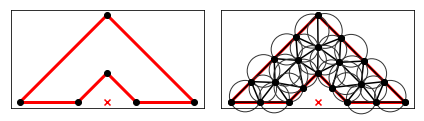

In [6]:
get_triangulation_result(inputPolygonInfo, 'Dpa0.5')

cosA = -0.2110477997007722
cosB = -0.2110477997007722
This is NOT Delone triangulation


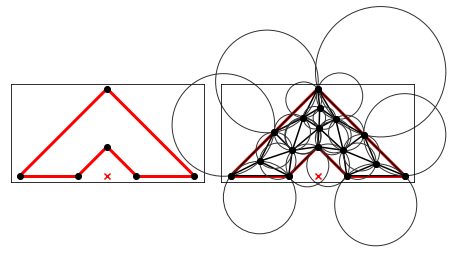

In [7]:
get_triangulation_result(inputPolygonInfo, 'pa0.5')